<a href="https://colab.research.google.com/github/andrelijeraldine/AlgoritmosOptimizacion/blob/main/Seminario_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos: Andreli Jeraldine Quilca Castañeda   <br>
Url: https://github.com/andrelijeraldine/AlgoritmosOptimizacion/blob/main/Seminario_Algoritmos.ipynb <br>
Problema:
### Problema 3: **Combinar cifras y operaciones**

- El problema consiste en analizar el siguiente escenario y diseñar un algoritmo que lo resuelva.

- Disponemos de las **9 cifras del 1 al 9** (se excluye el cero) y de los **4 signos básicos** de las operaciones fundamentales:  
  **suma (`+`)**, **resta (`-`)**, **multiplicación (`*`)** y **división (`/`)**.

- Debemos combinarlos **alternativamente** (dígito, operador, dígito, ...) **sin repetir ninguno de ellos** para obtener una **cantidad dada**.  
  Un ejemplo sería para obtener el número `4`:  
  `4 + 2 - 6 / 3 * 1 = 4`

- Debe analizarse el problema para encontrar **todos los valores enteros posibles**, planteando las siguientes cuestiones:
  - ¿Cuál es el **valor máximo** y el **valor mínimo** que se pueden obtener?
  - ¿Es posible encontrar **todos los valores enteros** entre dicho mínimo y máximo?

> 💡 *Nota:* Es posible usar la función de Python `eval()` para evaluar una expresión generada dinámicamente.
 <br>
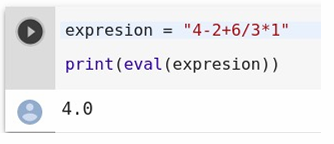
                                       

In [11]:
import itertools

# Dígitos del 1 al 9
digits = '123456789'

# Operadores permitidos
operators = ['+', '-', '*', '/']

# Conjunto para guardar los resultados enteros únicos
results = set()

# Generar todas las permutaciones de 5 dígitos sin repetir
for digit_combo in itertools.permutations(digits, 5):
    # Generar todas las permutaciones de los 4 operadores sin repetir
    for op_combo in itertools.permutations(operators, 4):
        # Construir expresión: d1 op1 d2 op2 d3 op3 d4 op4 d5
        expression = ''.join(d + o for d, o in zip(digit_combo, op_combo)) + digit_combo[-1]
        try:
            # Evaluar expresión
            result = eval(expression)
            # Verificar si el resultado es un número entero
            if isinstance(result, (int, float)) and result == int(result):
                results.add(int(result))
        except ZeroDivisionError:
            # Ignorar divisiones por cero
            continue

# Calcular mínimo, máximo y rango completo
print(results)
min_val = min(results)
max_val = max(results)
full_range = set(range(min_val, max_val + 1))
missing_vals = sorted(full_range - results)

# Mostrar resultados
print(f"Cantidad de resultados enteros únicos: {len(results)}")
print(f"Valor mínimo obtenido: {min_val}")
print(f"Valor máximo obtenido: {max_val}")
print(f"¿Rango continuo?: {'Sí' if not missing_vals else 'No'}")
if missing_vals:
    print(f"Primeros valores faltantes: {missing_vals[:10]}")


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, -69, -68, -67, -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -1, -9, -8, -7, -6, -5, -4, -3, -2, -10}
Cantidad de resultados enteros únicos: 147
Valor mínimo obtenido: -69
Valor máximo obtenido: 77
¿Rango continuo?: Sí


**¿Cuántas posibilidades hay sin tener en cuenta las restricciones?**





Cálculo total de posibilidades sin restricciones: <br>
**Dígitos (en 5 posiciones)**: <br>
Podemos elegir cualquier dígito del 1 al 9, y sí se pueden repetir, así que en cada posición hay 9 opciones: <br>
Opciones para dígitos = 9^5 = 59049 <br>

**Operadores (en 4 posiciones)**:<br>
Puedes elegir cualquiera de los 4 operadores, y también se pueden repetir, así que: <br>
Opciones para operadores = 4^4 = 256 <br>
Total sin restricciones=9^5 × 4^4 = 59049 × 256 = 15118544



In [ ]:
# Sin restricciones: se permiten repeticiones
# 5 posiciones de dígitos, cada una con 9 posibles (1 al 9)
# 4 posiciones de operadores, cada una con 4 posibles (+, -, *, /)
total_sin_restriccion = (9 ** 5) * (4 ** 4)

print(f"Total sin restricciones: {total_sin_restriccion}")

Total sin restricciones: 15116544


**¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.?**


Cálculo total de combinaciones posibles:
<br>
Elegir **5 dígitos** distintos (orden importa): <br>
Se usan permutaciones porque el orden sí importa en expresiones matemáticas.<br>
P(9,5)= 9 × 8 × 7 × 6 × 5 = 15120
<br>
<br>
Elegir **4 operadores** distintos (orden importa): <br>
Son todas las permutaciones de 4 elementos tomados de 4. <br>
P(4,4)= 4! = 24 <br>

Total de expresiones posibles = permutaciones de dígitos × permutaciones de operadores: <br>
15120 × 24 = 362880

In [ ]:
import math

# Permutaciones con restricciones
# Elegir y ordenar 5 dígitos distintos de 9 disponibles: P(9,5)
p_digitos = math.perm(9, 5)  # o: math.factorial(9) // math.factorial(4)

# Elegir y ordenar los 4 operadores sin repetir: P(4,4)
p_operadores = math.perm(4, 4)  # = 4!

total_con_restriccion = p_digitos * p_operadores

print(f"Total con restricciones: {total_con_restriccion}")

Total con restricciones: 362880


##Modelo para el espacio de soluciones
**¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)**

En este problema, la estructura de datos que considero más adecuada es una lista de tamaño 9 que alterna 5 dígitos y 4 operadores. Es decir, una lista con la forma:
expresion = [d1, op1, d2, op2, d3, op3, d4, op4, d5]

Cada posición de la lista representa un elemento de la expresión: las posiciones pares contienen los dígitos y las impares los operadores. Esta representación me pareció muy clara porque permite tener toda la expresión completa y ordenada, lo que facilita tanto su construcción como su evaluación.

Al inicio, utilicé una cadena de texto (str) para construir directamente la expresión con los operadores y los dígitos, ya que era más simple para evaluar con eval(). Sin embargo, después de analizar mejor el problema, me di cuenta de que una lista es más versátil. Por ejemplo, si quisiera aplicar backtracking, modificar parcialmente una expresión o validar paso a paso, la lista permite hacerlo de forma mucho más cómoda.

Además, esta estructura es parecida a la que se usa en el problema de las 4 reinas, donde en vez de usar una matriz, se usa una lista tipo reinas[fila] = columna para representar el estado del tablero de forma más eficiente.

Por eso, aunque empecé con cadenas por comodidad, cambié a una lista estructurada porque me da mayor control, legibilidad y eficiencia para trabajar con las expresiones.

## Según el modelo para el espacio de soluciones
**¿Cual es la función objetivo?**


La función objetivo
**F(X)** toma una expresión completa como entrada y la evalúa. Si el resultado es un número entero, lo considera válido. En caso contrario, la expresión se descarta. El objetivo general es obtener todos los valores enteros posibles generados por expresiones con 5 dígitos y 4 operadores distintos, sin repetir ninguno.
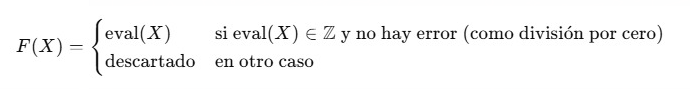


**¿Es un problema de maximización o minimización?**

Este problema no es estrictamente de maximización ni de minimización, como ocurre en problemas clásicos de optimización. En realidad, el objetivo principal es explorar todo el espacio de soluciones posibles (todas las expresiones válidas sin repetir dígitos ni operadores) y analizar qué resultados enteros se pueden obtener.



Diseña un algoritmo para resolver el problema por fuerza bruta

Para resolver este problema por fuerza bruta, se hizó un algoritmo que recorre todas las expresiones posibles formadas por 5 dígitos distintos (del 1 al 9) y 4 operadores distintos (+, -, *, /).

Utilicé funciones generadoras con yield para no cargar en memoria todas las combinaciones, lo que hace el algoritmo más eficiente en cuanto a uso de recursos, aunque sigue siendo fuerza bruta porque recorre exhaustivamente todo el espacio de soluciones posibles.

A partir de cada expresión generada, se evalua su resultado con eval() y filtré solo aquellos que devolvieran valores enteros.

In [30]:
from itertools import permutations

# Evalúa la expresión solo si devuelve un número entero
def evaluar_expresion(expresion):
    try:
        resultado = eval(expresion)
        if isinstance(resultado, (int, float)) and resultado == int(resultado):
            return int(resultado)
    except ZeroDivisionError:
        return None
    return None

# Genera todas las expresiones con 5 dígitos y 4 operadores (sin repetir)
def generar_expresiones(digitos, operadores):
    for digitos_sel in permutations(digitos, 5):
        for ops_sel in permutations(operadores, 4):
            expresion = str(digitos_sel[0])
            for i in range(4):
                expresion += ops_sel[i] + str(digitos_sel[i + 1])
            yield expresion

# Encuentra expresiones cuyo resultado sea exactamente el objetivo
def encontrar_por_objetivo(digitos, operadores, objetivo):
    soluciones = []
    for expresion in generar_expresiones(digitos, operadores):
        resultado = evaluar_expresion(expresion)
        if resultado == objetivo:
            soluciones.append(expresion)
    return soluciones



In [95]:
# ---------- Ejecutar para valor 4 ----------
digitos = [1, 2, 3, 4, 5, 6, 7, 8, 9]
operadores = ['+', '-', '*', '/']
objetivo = 4

soluciones = encontrar_por_objetivo(digitos, operadores, objetivo)

# Mostrar resultados
print(f"Expresiones que dan exactamente {objetivo}:")
print(", ".join(soluciones))
print(f"\nTotal de expresiones que dan {objetivo}: {len(soluciones)}")

Expresiones que dan exactamente 4:
1-2*3/6+4, 1-2/3*6+7, 1/2*4-3+5, 1/2*4+5-3, 1/2*4-5+7, 1*2+4-6/3, 1/2*4-6+8, 1/2*4+7-5, 1/2*4-7+9, 1/2*4+8-6, 1-2/4*8+7, 1/2*4+9-7, 1*2+5-9/3, 1-2/6*3+4, 1*2-6/3+4, 1/2*6-3+4, 1-2*6/3+7, 1/2*6+4-3, 1/2*6-4+5, 1/2*6+5-4, 1/2*6-7+8, 1/2*6+8-7, 1/2*6-8+9, 1/2*6+9-8, 1-2*8/4+7, 1*2-9/3+5, 1-3/2*4+9, 1-3*2/6+4, 1+3/2*8-9, 1-3*4/2+9, 1*3+4-6/2, 1-3*4/6+5, 1-3+4/6*9, 1-3/4*8+9, 1-3+4*9/6, 1*3+5-8/2, 1-3/6*2+4, 1*3-6/2+4, 1/3*6-2+4, 1/3*6+4-2, 1-3/6*4+5, 1/3*6-5+7, 1/3*6+7-5, 1/3*6-7+9, 1-3/6*8+7, 1-3*6/9+5, 1/3*6+9-7, 1*3-8/2+5, 1+3*8/2-9, 1-3*8/4+9, 1-3*8/6+7, 1/3*9-4+5, 1-3+9*4/6, 1/3*9+5-4, 1/3*9-5+6, 1-3+9/6*4, 1-3/9*6+5, 1/3*9+6-5, 1/3*9-6+7, 1/3*9+7-6, 1/3*9-7+8, 1/3*9+8-7, 1*4/2-3+5, 1+4-2*3/6, 1-4/2*3+9, 1*4/2+5-3, 1+4/2*5-7, 1*4/2-5+7, 1+4-2/6*3, 1*4+2-6/3, 1*4-2+6/3, 1*4/2-6+8, 1+4/2*6-9, 1*4/2+7-5, 1*4/2-7+9, 1*4/2+8-6, 1*4/2+9-7, 1+4-3*2/6, 1-4*3/2+9, 1+4-3/6*2, 1*4+3-6/2, 1*4-3+6/2, 1+4/3*6-5, 1-4*3/6+5, 1+4*5/2-7, 1*4+6/2-3, 1*4-6/2+3, 1+4*6/2-

**Calcula la complejidad del algoritmo por fuerza bruta**

La complejidad del algoritmo por fuerza bruta es O(1), ya que el espacio de soluciones es finito y fijo (362,880 expresiones), y no depende de un parámetro de entrada variable. Cada operación se hace en tiempo constante, así que en notación Big O se considera tiempo constante.

**Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta**

Aplicar una poda temprana para descartar combinaciones que nunca darán un número entero.
Esto se logra verificando durante la construcción de la expresión si una operación intermedia ya genera un decimal. Si eso ocurre, se abandona la expresión inmediatamente sin seguir construyéndola.

Reduce significativamente el espacio de búsqueda: no se genera toda la expresión si ya se sabe que el resultado intermedio no será válido.

Evita llamadas innecesarias a eval(), que es costosa.

Disminuye el número total de iteraciones reales, aunque la complejidad teórica sigue siendo factorial.


In [37]:
from itertools import permutations

# Función que evalúa una expresión y retorna su resultado solo si es entero
def evaluar_expresion(expresion):
    try:
        resultado = eval(expresion)
        if resultado == int(resultado):
            return int(resultado)
    except ZeroDivisionError:
        return None
    return None

# Función que va construyendo la expresión paso a paso
# y detiene la construcción si encuentra un resultado no entero
def construir_y_evaluar(digitos, operadores, objetivo):
    soluciones = []

    for digitos_sel in permutations(digitos, 5):  # P(9,5)
        for ops_sel in permutations(operators):   # P(4,4)

            expresion = str(digitos_sel[0])
            seguir = True

            #  A medida que se construye la expresión, se evalúa parcialmente
            for i in range(4):
                expresion += ops_sel[i] + str(digitos_sel[i + 1])

                #OPTIMIZACIÓN: si en algún paso la expresión parcial no es entera, se descarta
                parcial = evaluar_expresion(expresion)
                if parcial is None:
                    seguir = False
                    break  # Poda anticipada: no seguimos con esta combinación

            if seguir:
                resultado = evaluar_expresion(expresion)
                if resultado == objetivo:
                    soluciones.append(expresion)
    return soluciones


In [94]:
# Parámetros
digitos = [1, 2, 3, 4, 5, 6, 7, 8, 9]
operadores = ['+', '-', '*', '/']
objetivo = 4

# Ejecutar algoritmo mejorado
soluciones = construir_y_evaluar(digitos, operadores, objetivo)

# Mostrar resultados
print(f"Se encontraron {len(soluciones)} soluciones para {objetivo}:\n")
print(", ".join(soluciones))

Se encontraron 1676 soluciones para 4:

1-2*3/6+4, 1*2+4-6/3, 1*2+5-9/3, 1*2-6/3+4, 1-2*6/3+7, 1-2*8/4+7, 1*2-9/3+5, 1-3*2/6+4, 1-3*4/2+9, 1*3+4-6/2, 1-3*4/6+5, 1-3+4*9/6, 1*3+5-8/2, 1*3-6/2+4, 1-3*6/9+5, 1*3-8/2+5, 1+3*8/2-9, 1-3*8/4+9, 1-3*8/6+7, 1-3+9*4/6, 1*4/2-3+5, 1+4-2*3/6, 1-4/2*3+9, 1*4/2+5-3, 1+4/2*5-7, 1*4/2-5+7, 1*4+2-6/3, 1*4-2+6/3, 1*4/2-6+8, 1+4/2*6-9, 1*4/2+7-5, 1*4/2-7+9, 1*4/2+8-6, 1*4/2+9-7, 1+4-3*2/6, 1-4*3/2+9, 1*4+3-6/2, 1*4-3+6/2, 1-4*3/6+5, 1+4*5/2-7, 1*4+6/2-3, 1*4-6/2+3, 1+4*6/2-9, 1*4+6/3-2, 1*4-6/3+2, 1+4*6/3-5, 1+4*9/6-3, 1*5+2-9/3, 1*5-3+4/2, 1+5-3*4/6, 1+5-3*6/9, 1*5+3-8/2, 1*5-3+8/4, 1*5+4/2-3, 1+5*4/2-7, 1+5-4*3/6, 1*5-4+6/2, 1-5+4*6/3, 1*5-4+9/3, 1*5+6/2-4, 1-5+6/3*4, 1+5*6/3-7, 1+5-6*3/9, 1-5+6*4/3, 1*5-8/2+3, 1*5+8/4-3, 1+5*8/4-7, 1*5-9/3+2, 1*5+9/3-4, 1*6/2-3+4, 1-6*2/3+7, 1*6/2+4-3, 1*6/2-4+5, 1+6/2*4-9, 1*6/2+5-4, 1*6/2-7+8, 1*6/2+8-7, 1*6/2-8+9, 1*6/2+9-8, 1*6/3-2+4, 1-6/3*2+7, 1*6/3+4-2, 1+6/3*4-5, 1+6/3*5-7, 1*6/3-5+7, 1*6/3+7-5, 1*6/3-7+9, 1-6

**Calcula la complejidad del algoritmo**

Complejidad en notación Big-O : O(n!) 	​
 (factorial, por las permutaciones)

**Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios**

**Aplica el algoritmo al juego de datos generado**

In [92]:
import random
import time
import pandas as pd
from itertools import permutations

# Crear dataset con datos aleatorios
datos = {'solucion': [], 'numeros': [], 'operadores': [], 'objetivo': [], 'tiempo': []}

for _ in range(10):  # Repetimos para 10 combinaciones diferentes
    digitos = random.sample(range(1,10), 5)
    operadores = random.sample(['+', '-', '*', '/'], 4)
    objetivo = random.randint(1,50)

    inicio = time.time()
    soluciones = construir_y_evaluar(digitos, operadores, objetivo)
    fin = time.time()

    datos['solucion'].append(soluciones[:5])  # Mostrar solo las primeras 5 soluciones
    datos['numeros'].append(digitos)
    datos['operadores'].append(operadores)
    datos['objetivo'].append(objetivo)
    datos['tiempo'].append(round(fin - inicio, 4))

# Crear y mostrar el DataFrame
df_dataset = pd.DataFrame(datos)
display(df_dataset)

,solucion,numeros,operadores,objetivo,tiempo
0,[],"[9, 8, 1, 6, 2]","[*, -, +, /]",22,0.1900
1,"[4/2+7-1*5, 4/2+7*1-5, 4/2+7-5*1, 4/2+1*7-5, 4...","[2, 4, 7, 1, 5]","[/, -, *, +]",4,0.1559
2,[],"[4, 7, 6, 2, 1]","[-, *, /, +]",35,0.1451
3,"[6+7*5-3/1, 6+7*5/1-3, 6+7/1*5-3, 6+5*7-3/1, 6...","[6, 7, 5, 3, 1]","[+, /, -, *]",38,0.1503
4,[],"[2, 7, 4, 5, 6]","[+, *, /, -]",7,0.1324
5,"[8/2*7-4+5, 8/2*7+5-4, 8*7/2-4+5, 8*7/2+5-4, 4...","[2, 8, 4, 5, 7]","[-, +, *, /]",29,0.1285
6,[],"[1, 3, 8, 6, 7]","[-, *, +, /]",8,0.1565
7,"[7*9/3-8+2, 7*9/3+2-8, 9*7/3-8+2, 9*7/3+2-8, 9...","[7, 9, 8, 3, 2]","[-, *, +, /]",15,0.1275
8,[],"[9, 2, 3, 7, 1]","[-, /, *, +]",5,0.1766
9,[],"[6, 3, 9, 5, 8]","[/, +, *, -]",6,0.1353


**Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo**

Python Software Foundation. (2023). itertools — Functions creating iterators for efficient looping. Python 3.12.
https://docs.python.org/3/library/itertools.html

Lutz, M. (2013). Learning Python (5th ed.). O'Reilly Media.
(Capítulo sobre estructuras de control y funciones avanzadas como eval() y itertools)

**Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño**

Una posible línea de estudio es aumentar el tamaño del conjunto de entrada, por ejemplo:

Utilizar 6 dígitos y 5 operadores (con nuevas combinaciones posibles),

Incluir el dígito 0, considerando reglas especiales para evitar divisiones por cero o números con ceros iniciales,

Permitir repetición de dígitos u operadores, aumentando así el espacio de soluciones y acercándose a problemas del tipo enumeración con repetición.

Se pueden incluir nuevos operadores como:

Exponenciación (**)

Módulo (%)

Paréntesis para cambiar la prioridad de operaciones
Esto implicaría modificar el generador de expresiones para contemplar la jerarquía de operadores y analizar combinaciones mucho más complejas.